In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

In [2]:
NUM_CLASSES=10
img_rows = 28
img_cols = 28

(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
y_train = tf.keras.utils.to_categorical(y_train,NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test,NUM_CLASSES)



11501568/11490434 [==============================] - 0s 0us/step


In [3]:
y_train.shape

(60000, 10)

將X_train及X_test由原本三維轉為四維矩陣以符合CNN的格式
除以255進行標準化
y_train y_test轉為Onehot encoding

In [4]:
def load_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(img_rows,img_cols,1),activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128,activation='relu'))
  model.add(tf.keras.layers.Dense(128,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(NUM_CLASSES,activation='softmax'))
  return model

In [5]:
model = load_model()
model.summary()   

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 dropout (Dropout)           (None, 4, 4, 64)          0

In [6]:
#loss_function=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_function='categorical_crossentropy'
batch_size=1000
epochs=20
model.compile(optimizer='adam',loss=loss_function,metrics=['accuracy'])

In [7]:
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,shuffle=True)

Epoch 1/20
60/60 [==============================] - 15s 44ms/step - loss: 0.9192 - accuracy: 0.6927
Epoch 2/20
60/60 [==============================] - 3s 43ms/step - loss: 0.2025 - accuracy: 0.9403
Epoch 3/20
60/60 [==============================] - 3s 43ms/step - loss: 0.1308 - accuracy: 0.9614
Epoch 4/20
60/60 [==============================] - 3s 43ms/step - loss: 0.0971 - accuracy: 0.9714
Epoch 5/20
60/60 [==============================] - 3s 44ms/step - loss: 0.0794 - accuracy: 0.9775
Epoch 6/20
60/60 [==============================] - 3s 44ms/step - loss: 0.0704 - accuracy: 0.9795
Epoch 7/20
60/60 [==============================] - 3s 43ms/step - loss: 0.0602 - accuracy: 0.9828
Epoch 8/20
60/60 [==============================] - 3s 44ms/step - loss: 0.0545 - accuracy: 0.9842
Epoch 9/20
60/60 [==============================] - 3s 44ms/step - loss: 0.0484 - accuracy: 0.9855
Epoch 10/20
60/60 [==============================] - 3s 44ms/step - loss: 0.0480 - accuracy: 0.9862
Epoch 11

In [8]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0212 - accuracy: 0.9934 - 1s/epoch - 5ms/step


[0.021165993064641953, 0.993399977684021]

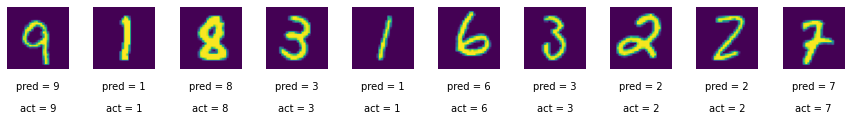

In [9]:
TAG = np.array(['0','1','2','3','4','5','6','7','8','9'])
preds = model.predict(x_test)
preds_single = TAG[np.argmax(preds, axis = -1)]
actual_single = TAG[np.argmax(y_test, axis = -1)]
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.imshow(tf.squeeze(img))